<h1>Importing libraries</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Bracketing search</h1>

<h4>Can stuck in local minima</h4>

The aim of bracketing search is to find a range within which the minimum is located.

first a range [x_min, x_max] along with an initial point x_init are specified. Also, we need a step determining how much
we should move (absolute value) and in what direction we should move (step sign). Also, in order to make the process of
finding the minimum faster, we can have a step_growth rate. It helps moving faster in a direction we believe the minimum
is at.

In [3]:
def Bracketing(f, x_init, x_min, x_max,step = 1e-2, step_growth = 1.1, plotting_step = 0.01, 
               plot_function=True):
    """
    the aim is to find a<b<c such that f(a) > f(b) and f(b) < f(c)
    
    f:           univariate and unimodal function to be minimized.
    x_init       initial point of search.   
    x_min:       The beginning of the search interval.   
    x_max:       End of search interval.
    step:        The amount of movement in the optimal direction.
    step_growth: step size growth if the direction was optimum

    returns an interval in which the minimizer lies
    """
    
    a, fa = x_init, f(x_init)
    
    if a + step < x_min or a + step > x_max:
        step = -step
    
    b, fb = a + step, f(a + step)
    
    if plot_function:
        X = np.arange(x_min,x_max+plotting_step,plotting_step)
        plt.figure(figsize = (8,6), dpi = 100)
        plt.plot(X,list(map(f,X)))
        plt.title('Minimization with Bracketing method',fontname = 'Times New Roman', size = 20)
        plt.xlabel('X', size = 20, fontname = 'Times New Roman')
        plt.ylabel('f(x)', size = 20, fontname = 'Times New Roman')
    
    Sols = []
    Sols.append(x_init)
    while True:
        
        if fb > fa: # this means our direction was wrong as we have growth
            step = -step    # change the movement direction
            a, b = b, a     # change the beginning and end of the interval
            fa, fb = fb, fa # change the corresponding funciton values of beginning and end of the interval
        
        c, fc = b + step, f(b + step)
        
        if c > x_max or c < x_min:
            return (0,0) # the answer is not in [x_min, x_max]
        
        if plot_function:
            plt.scatter([a,b,c],[f(a),f(b),f(c)],c='r')
        
        if fb < fc: # reached to an interval => end and return the interval since there is a growth in c compared to be
            if a < c:
                return (a,c)
            else:
                return (c,a)
    
        a, b = b, c               # update a and b
        fa, fb = fb, fc           # update function values at a and b
        step = step * step_growth # increase the step size as you are moving in the correct direction

<h3>Using bracketing search</h3>

(-0.35, 0.436)


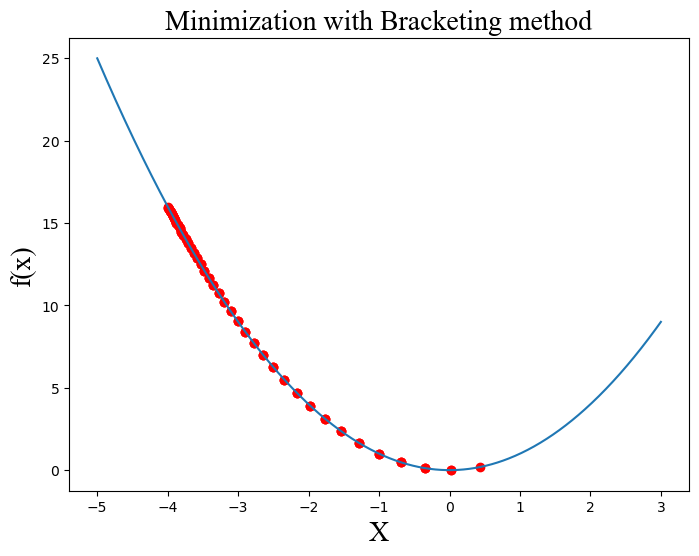

In [5]:
f1 = lambda x: abs(x)
f2 = lambda x: x**2
f3 = lambda x: max(-x**3,x**2-150)

x_init = -4
min_, max_ = Bracketing(f2,x_init,x_min = -5, x_max = 3, step = 1e-2, step_growth = 1.1)

if min_ == max_ == 0:
    print('The solution is not in provided [x_min,x_max]')
    print('minimum value is found in either ends of the range.')
else:
    print(f'{(round(min_,3),round(max_,3))}')

<h1>Fibonacci search</h1>

<h4>Can stuck in local minima</h4>

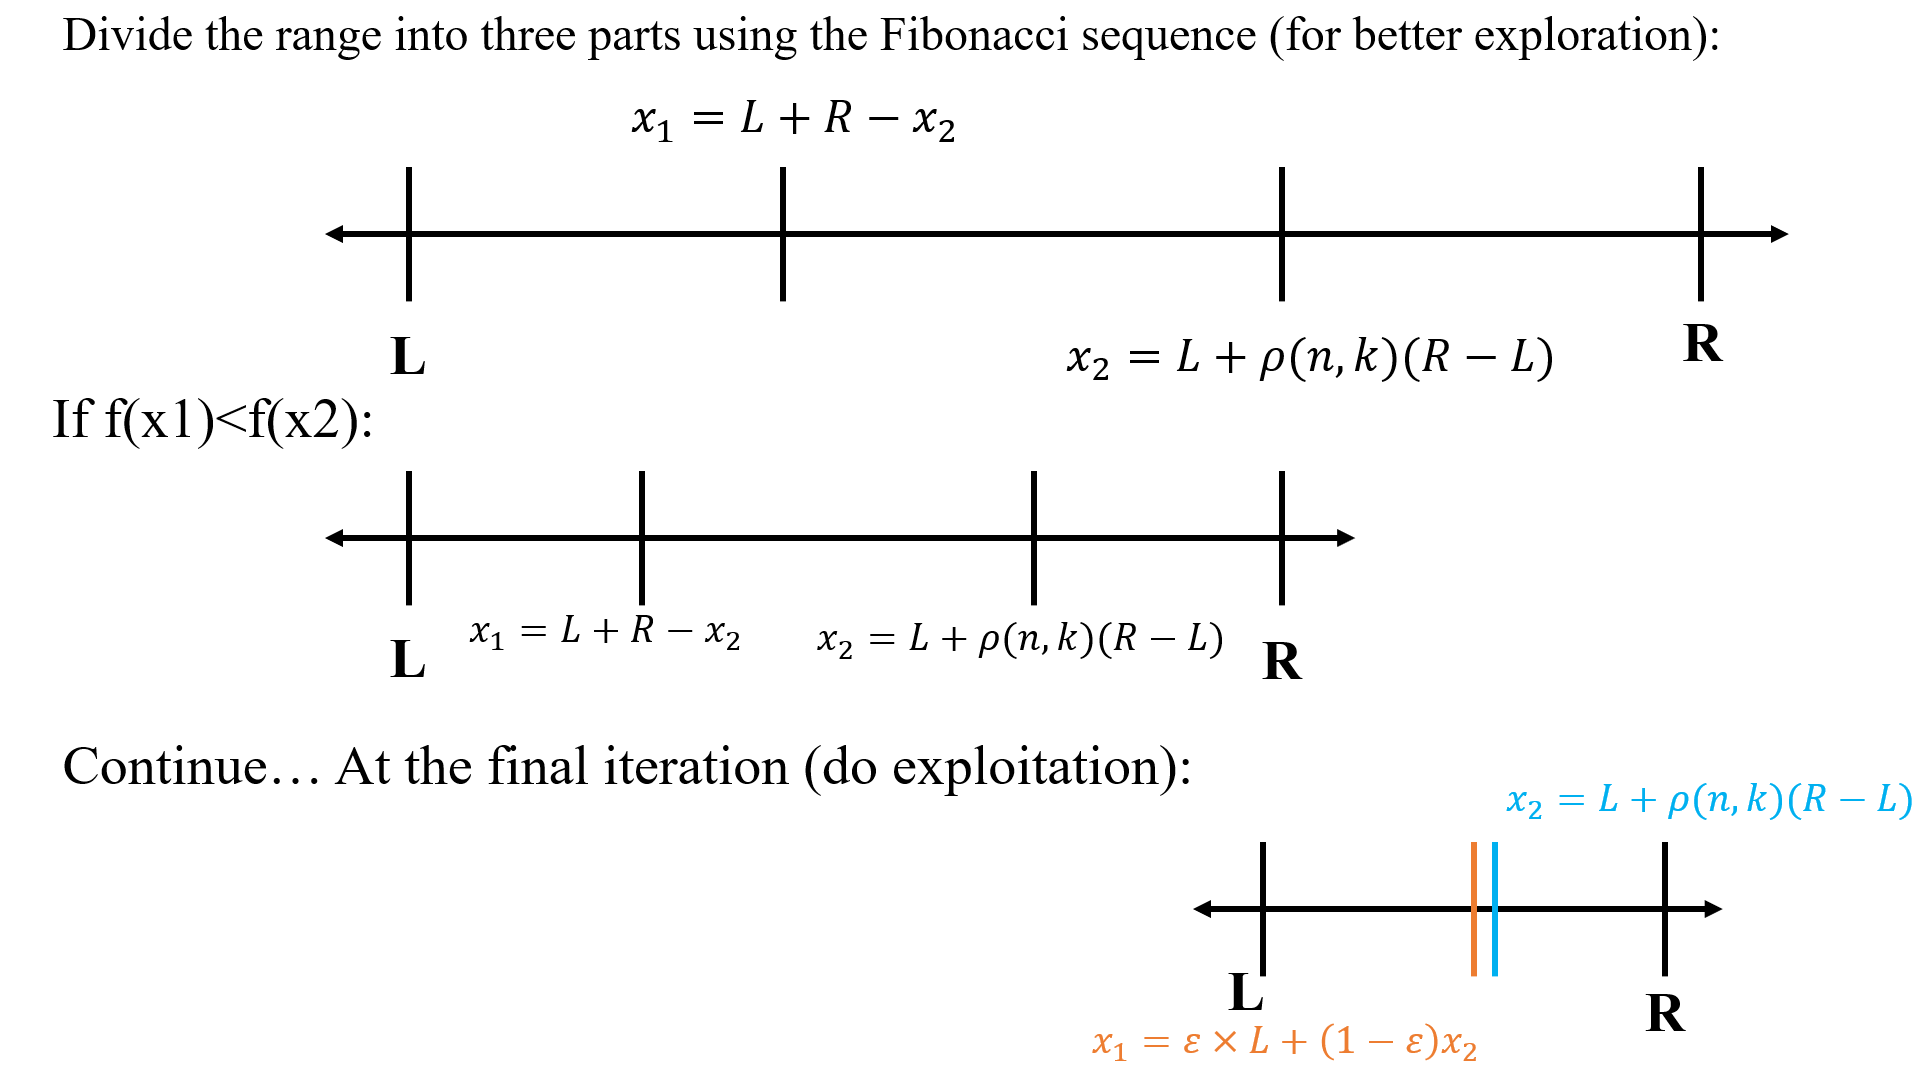

The algorithms attempts to break the search space into three parts and perform a more effective search in these parts.
It is executed for n iterations using n first terms of the fibonacci sequence. Ratio of two consecutive fibonacci term
determines how to divide the search space into three parts.

In [10]:
def Fibonacci_Search(f,L,R,n,eps):

    '''
        n: number of iterations = number of fibonacci sequence numbers
        L: left hand side of the range
        R: right hand side of the range
        (L,R): search in this range
        eps: at the nth (final) iteration find new point using eps instead of fibonacci ratio
    '''

    def rho(n,k):
        '''
            rho(n,k) = Fibo(n-k)/Fibo(n-k+1)
            
            this is the ratio of nth fibonacci number to (n+1)th fibonacci number
            this formula is derived from closed form of the fibonacci sequence
            
            it is possible to generate n terms of the fibonacci sequence and manually 
            calculate the ratios but this is a better method
        '''
        
        phi = (1+5**0.5)/2  # a constant number known as the golden ratio 
        s = (1-5**0.5)/(1+5**0.5)
        
        return (1-s**(n-k+1)) / (phi*(1-s**(n-k+2)))

    for k in range(1, n +1): # for n iterations, k should start from 1 since we need it in rho
        
        x2 = L + rho(n,k) * (R-L) # find x2
        
        # find x1 using x2
        if k == n:
            '''
               at the final iteration, instead of using fibonacci ratios, 
               use epsilon to remove maximum part of the search space
            ''' 
            x1 = eps*L + (1-eps)*x2
        else:
            x1 = L + R - x2

        fx1, fx2 = f(x1), f(x2)

        if fx1 < fx2: # x1 is always on the left of x2 (x1<x2) so the right changes to x2
            # L = L (no change)
            R = x2
        else: # fx2 < fx1
            L = x1
            # R = R (no change)

    return (L,R)

<h3>Using Fibonacci search</h3>

0.7692307692307694 0.9230769230769232


Text(0, 0.5, 'f(x)')

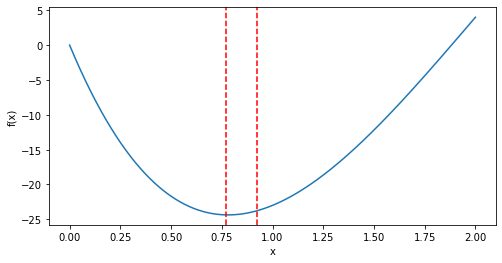

In [21]:
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
L,R = 0,2
n = 6
eps=0.01

L_final,R_final = Fibonacci_Search(f,L,R,n,eps)

print(L_final,R_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(L,R,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(L_final, color = 'red', linestyle='--')
plt.axvline(R_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>Golden section search</h1>

<h4>Can stuck in local minima</h4>

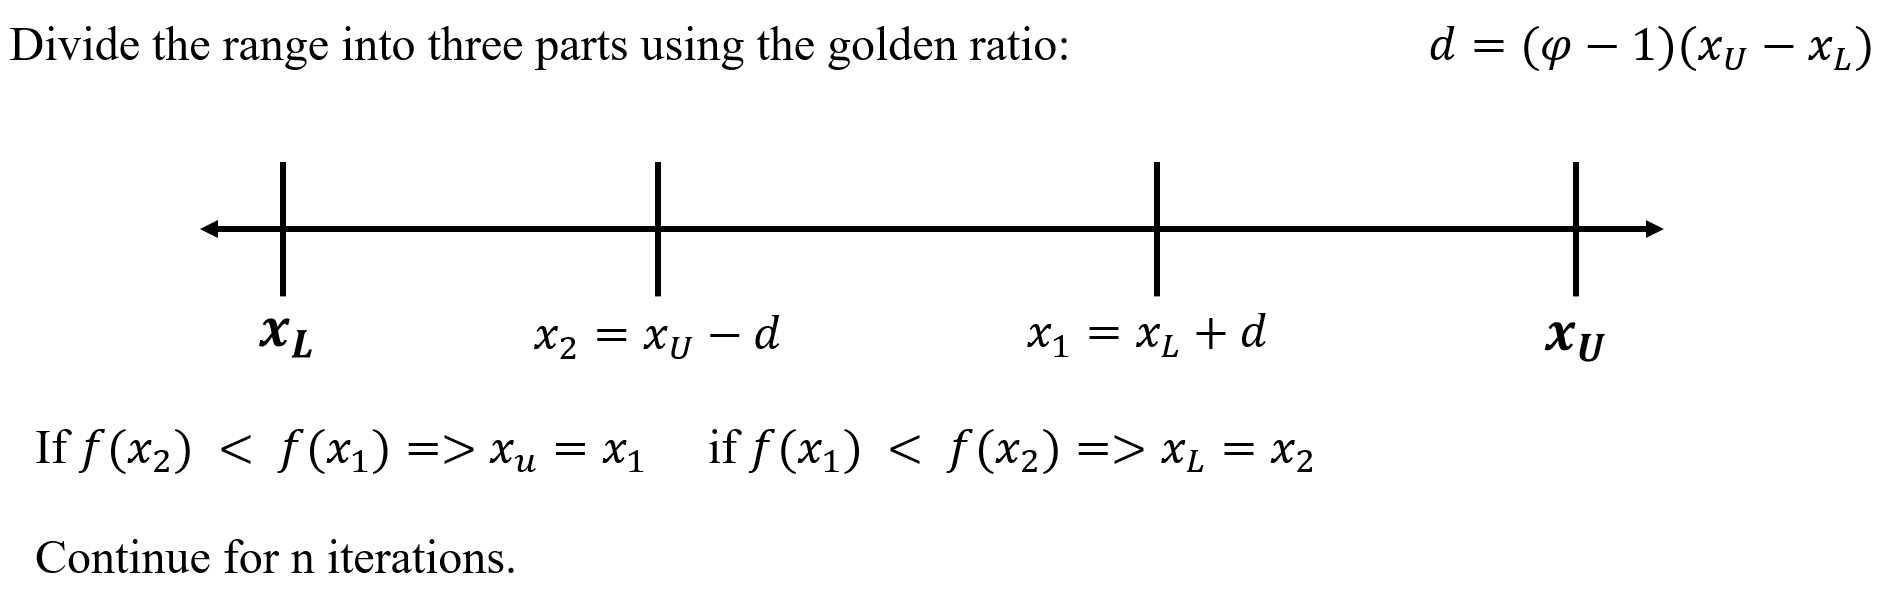

Golden section search uses the golden ratio (limit of fibonacci ratios or Fn+1/Fn when n goes to infinity) to divide the
search space into three parts. Since there is no fibonacci sequence, there is no limit on the number of iterations.

In [22]:
def Golden_Section_Search(f, xL, xU, num_iter, plotting_step = 0.1, plot_function=True, plot_best_sols=True):
    
    phi = (5**0.5 + 1)/2
    for i in range(num_iter):
        d = (phi - 1)*(xU - xL)
        x1 = xL + d
        x2 = xU - d
        # always => xL < x2 < x1 < xU
        
        fx1, fx2 = f(x1), f(x2)
        
        if fx1 < fx2:
            # the answer is not less than x2 for sure so xL = x2
            xL = x2
        else:
            # fx1 > fx2 which means that the answer is not greater that x1 so xU = x1
            xU = x1
    
    return (xL,xU)

1.3466179497939021 1.509230324909569


Text(0, 0.5, 'f(x)')

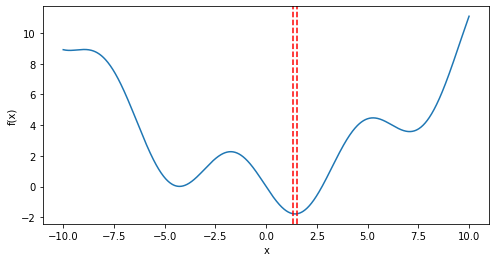

In [25]:
f = lambda x: 0.1 * x**2 - 2 * np.sin(x)

xL = -10
xU = 10
num_iter = 10
xL_final, xU_final = Golden_Section_Search(f, xL, xU, num_iter)

print(xL_final,xU_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(xL,xU,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(xL_final, color = 'red', linestyle='--')
plt.axvline(xU_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>Quadratic fit search</h1>

<h4>Can stuck in local minima</h4>

<h1>Shubert-Piyavskii method</h1>

<h4>Finds global minima</h4>

In [14]:
f = lambda x: -(x**4 - 4*x**3 - 30*x**2 - 50*x + 200) #-(0.1 * x**2 - 2 * np.sin(x))

a, b = -5, 7
Slope = 300  # Lipschitz constant
tolerance = 0.05  # Convergence threshold



# Initialization
max_x_intersection = (a + b) / 2  # Initialize maximizer
X = [a, b, max_x_intersection]  # Initial points: start, end, midpoint
X.sort()

error = float('inf')
while error > tolerance:
    Maximizer_old = max_x_intersection
    max_y_intersection = float('-inf')
    
    fs = list(map(f,X))
    for i in range(1,len(X)):
        x_left, x_right = X[i - 1], X[i]
        f_left, f_right = fs[i-1], fs[i]
        
        y = 0.5 * (f_left + f_right + Slope * (x_right - x_left))
        x = (y - f_left + Slope * x_left) / Slope
        
        if y > max_y_intersection:
            max_y_intersection = y
            max_x_intersection = x
    
    error = abs( max_y_intersection - f(max_x_intersection) )
    
    print('===============================')
    print(f'Relative change = {round( error ,5)}')
    print(f'Maximizer = {round(max_x_intersection,5)}')
    
    X.append(max_x_intersection)
    X = sorted(set(X))  # Use set to avoid duplicates

Relative change = 437.03836
Maximizer = 5.18
Relative change = 341.23643
Maximizer = 4.4516
Relative change = 169.40684
Maximizer = 5.9084
Relative change = 92.46566
Maximizer = 5.62605
Relative change = 94.26145
Maximizer = 6.19074
Relative change = 56.84839
Maximizer = 5.47194
Relative change = 40.00746
Maximizer = 5.78016
Relative change = 39.51651
Maximizer = 6.03364
Relative change = 60.94916
Maximizer = 6.34784
Relative change = 22.13228
Maximizer = 5.71348
Relative change = 18.77421
Maximizer = 5.84684
Relative change = 22.22587
Maximizer = 6.0995
Relative change = 18.29724
Maximizer = 5.96778
Relative change = 36.95651
Maximizer = 5.3772
Relative change = 21.4
Maximizer = 5.56669
Relative change = 9.12977
Maximizer = 5.87813
Relative change = 9.84996
Maximizer = 5.81555
Relative change = 8.80352
Maximizer = 5.93728
Relative change = 9.70217
Maximizer = 5.99827
Relative change = 9.77953
Maximizer = 5.75037
Relative change = 12.61754
Maximizer = 5.6766
Relative change = 20.80579


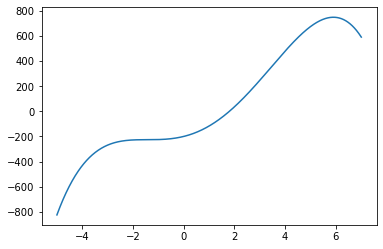

In [15]:
plt.plot(np.linspace(a,b,1000),list(map(f,np.linspace(a,b,1000))))